In [81]:
from __future__ import print_function
import matplotlib.pyplot as plt
import copy
import numpy as np
from scipy.integrate import trapz, simps
import corner
%matplotlib inline

In [4]:
from colossus.cosmology import cosmology

In [35]:
cosmo = cosmology.setCosmology('planck15',)

In [8]:
print(cosmo)

Cosmology "planck15" 
    flat = True, Om0 = 0.3089, Ode0 = 0.6910, Ob0 = 0.0486, H0 = 67.74, sigma8 = 0.8159, ns = 0.9667
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


In [9]:
cosmo.Om0 = 0.29
cosmo.Omde = 0.71
#cosmo.Omb0 = 0.02247
cosmo.ns = 0.97
cosmo.H0 = 70
cosmo.relspecies = False
cosmo.checkForChangedCosmology()
print(cosmo)

Cosmology: Detected change in cosmological parameters.
Cosmology "planck15" 
    flat = True, Om0 = 0.2900, Ode0 = 0.7100, Ob0 = 0.0486, H0 = 70.00, sigma8 = 0.8159, ns = 0.9700
    de_model = lambda, relspecies = False, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


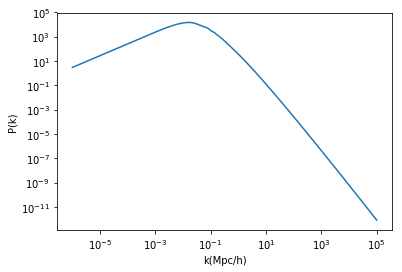

In [10]:
k = 10 ** np.linspace(-6, 5 , 100000)
Pk = cosmo.matterPowerSpectrum(k, 0.57)

plt.figure()
plt.loglog()
plt.xlabel('k(Mpc/h)')
plt.ylabel('P(k)')
plt.plot(k, Pk, '-')

In [17]:
Pk_ = cosmo.matterPowerSpectrum

In [19]:
Pk_

<bound method Cosmology.matterPowerSpectrum of <colossus.cosmology.cosmology.Cosmology object at 0x7f8f22deee80>>

(100, 300000.0)

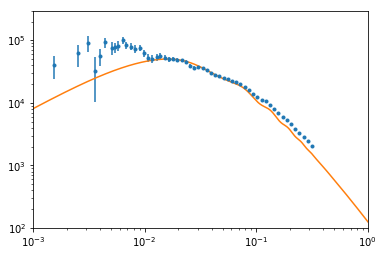

In [36]:
#Datos y papes relacionados en http://www.sdss3.org/science/boss/publications.php
pk_cmasdr12 = np.loadtxt('GilMarin_2016_CMASSDR12_measurement_monopole_post_recon.txt').T
plt.figure()
plt.loglog()
plt.errorbar(pk_cmasdr12[0], pk_cmasdr12[1], yerr = pk_cmasdr12[2], fmt = '.')
plt.plot(k, 1.85 ** 2 * Pk, '-')
plt.xlim(1e-3, 1)
plt.ylim(100, 3e5)

In [16]:
pk_cmasdr12[2]

array([3.10900000e-03, 9.02651067e+04, 2.54843021e+04])

In [ ]:
from astropy.convolution import 

In [61]:
cosmo = cosmology.setCosmology('planck15',)
print(cosmo)
def Pk_Om(Om_,b2, k, z=0.57):
    cosmo.Om0 = Om_
    return b2 * cosmo.matterPowerSpectrum(k, z)

Cosmology "planck15" 
    flat = True, Om0 = 0.3089, Ode0 = 0.6910, Ob0 = 0.0486, H0 = 67.74, sigma8 = 0.8159, ns = 0.9667
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False


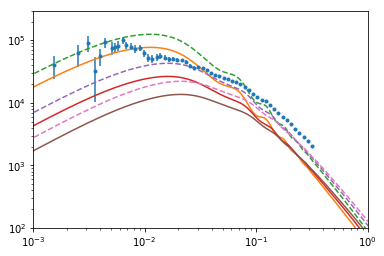

In [62]:
plt.figure()
plt.loglog()
plt.errorbar(pk_cmasdr12[0], pk_cmasdr12[1], yerr = pk_cmasdr12[2], fmt = '.')
OM = [0.2, 0.3, 0.4]
for om in OM:
    plt.plot(k, Pk_Om(om,1.85, k), '-')
    plt.plot(k, Pk_Om(om,3, k), '--')
    plt.xlim(1e-3, 1)
    plt.ylim(100, 3e5)

<ErrorbarContainer object of 3 artists>

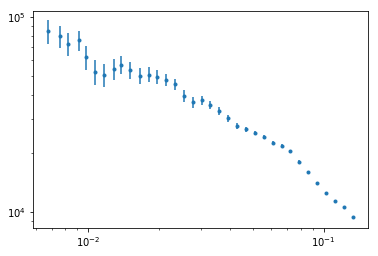

In [54]:
plt.figure()
plt.loglog()
plt.errorbar(pk_cmasdr12[0][10:45], pk_cmasdr12[1][10:45], yerr = pk_cmasdr12[2][10:45], fmt = '.')

In [59]:
pk_cmasdr12[2][10:45].mean()

3398.9837749142853

In [58]:
pk_cmasdr12[2]

array([1.62240169e+04, 2.37001940e+04, 2.54843021e+04, 2.20465106e+04,
       1.71066296e+04, 1.70806956e+04, 1.82035585e+04, 1.43218951e+04,
       1.45442137e+04, 1.32676304e+04, 1.15277088e+04, 1.03251678e+04,
       1.02075717e+04, 9.00008869e+03, 8.80409009e+03, 7.66356455e+03,
       7.04367198e+03, 6.47438690e+03, 6.05927942e+03, 5.35360749e+03,
       4.95435278e+03, 4.46696514e+03, 3.91365791e+03, 3.42813188e+03,
       3.00378485e+03, 2.70329755e+03, 2.29417996e+03, 1.90651167e+03,
       1.68702753e+03, 1.41614870e+03, 1.18340880e+03, 9.88233204e+02,
       8.14468942e+02, 7.00399698e+02, 5.94789714e+02, 4.94841652e+02,
       4.22315531e+02, 3.53924209e+02, 2.84330918e+02, 2.36927746e+02,
       1.86669357e+02, 1.52779279e+02, 1.26713083e+02, 1.05225499e+02,
       8.62089650e+01, 6.99500350e+01, 5.49969330e+01, 4.56257430e+01,
       3.92142190e+01, 3.27141760e+01, 2.68638130e+01, 2.35425150e+01,
       1.95781920e+01, 1.64680530e+01, 1.44477870e+01])

# 1 Obtencion de datos

In [60]:
data = pk_cmasdr12

# 2 Definicion del modelo a evaluar

In [104]:
def lnlh(theta):
    modelo=Pk_Om(theta[0],theta[1], data[0][10:45]) # Se evalua el modelo en todos los datos independientes o 'x' del experimento
    diferencia = data[1][10:45] - modelo # Se compara el modelo con los datos
    u=0
    u = diferencia, data[2][10:45] 
    u = np.dot(u,diferencia.T) # Se multiplica el valor pasado por la diferencia
    u = -0.5 * np.sum(u) #Se multiplica por -1/2 y se suman los valores
    return u

def Markov(theta1, thetap): # Se ingresa con un punto inicial y con un punto de prueba
    p1 = lnlh(theta1) # Se evalua el likelihood para el primer punto
    pp = lnlh(thetap) # Se evalua el likelihood para el segundo punto
    if(pp>p1): # Se acepta el nuevo punto si el likelihood es mayor al punto anterior
        return thetap
    else: #Si es menor, segenera un punto aleatorio entre 0 y 1
        w = np.random.rand()
        if(pp-p1>np.log(w)): # Si la diferencia entre los likelihoods del nuevo punto menos el punto antorior es mayor al
                            # aleatorio, se acepta el nuevo punto
            return thetap
        else:
            return theta1 # Si no es mayor, se rechaza y se genera otro punto en otra cadena
    return

def priors(pars, plist):
    a, b = pars
    if plist[0]<a<plist[1] and plist[2]<b<plist[3]:
        return 0.0
    return -np.inf


def log_post(pars,z,data,cov,plist):
    prior = priors(pars,plist)
    if not np.isfinite(prior):
        return -np.inf
    return prior + lnlh(pars,z,data,cov)

In [108]:
Nmuestras = 100
sigma1 = 0.05
sigma2 = 0.05

Ncadenas = 1
thetas = [.5,0.01]
cadenas = []


for j in range(Ncadenas):
    thetas = np.array([np.random.normal(np.random.uniform(0.4, .0100), sigma1), np.random.normal(thetas[1], sigma2)])
    for i in range(Nmuestras):
        if i==0:
            cadena = thetas
        else:
            thetat = np.array([np.random.normal(thetas[0], sigma1), np.random.normal(thetas[1], sigma2)])
            thetanuevo = Markov(thetas, thetat)
            cadena = np.vstack((cadena, thetanuevo))
            thetas = thetanuevo
    if j==0:
        cadenas = cadena
    else:
        cadenas = np.vstack((cadenas, cadena))

/home/luiscantero/anaconda3/lib/python3.6/site-packages/colossus/cosmology/power_spectrum.py:266: RuntimeWarning: invalid value encountered in double_scalars
  bc = 1.0 / (1.0 + b1 * ((omc / Om0)**b2 - 1.0))
/home/luiscantero/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


Exception: Result is nan (cosmology planck15, filter tophat, R 8.00e+00, j 0.

In [ ]:
x1 = cadenas[0:Nmuestras,0]
y1 = cadenas[0:Nmuestras,1]
x2 = cadenas[Nmuestras+1:Nmuestras*2,0]
y2 = cadenas[Nmuestras+1:Nmuestras*2,1]
x3 = cadenas[2*Nmuestras+1:Nmuestras*3,0]
y3 = cadenas[2*Nmuestras+1:Nmuestras*3,1]
x4 = cadenas[3*Nmuestras+1:Nmuestras*4,0]
y4 = cadenas[3*Nmuestras+1:Nmuestras*4,1]
x5 = cadenas[4*Nmuestras+1:Nmuestras*5,0]
y5 = cadenas[4*Nmuestras+1:Nmuestras*5,1]
x6 = cadenas[5*Nmuestras+1:Nmuestras*6,0]
y6 = cadenas[5*Nmuestras+1:Nmuestras*6,1]
x7 = cadenas[6*Nmuestras+1:Nmuestras*7,0]
y7 = cadenas[6*Nmuestras+1:Nmuestras*7,1]
x8 = cadenas[7*Nmuestras+1:Nmuestras*8,0]
y8 = cadenas[7*Nmuestras+1:Nmuestras*8,1]

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size':15})
plt.scatter(x1, y1, color = 'g',s=1)
plt.scatter(x2, y2, color = 'r',s=1)
plt.scatter(x3, y3, color = 'y',s=1)
plt.scatter(x4, y4, color = 'b',s=1)
plt.scatter(x5, y5, color = 'c',s=1)
plt.scatter(x6, y6, color = 'm',s=1)
plt.scatter(x7, y7, color = 'k',s=1)
plt.scatter(x8, y8, color = 'w',s=1)
plt.xlabel('b')
plt.ylabel('Om')


## Histograma de datos con burning

In [ ]:
nb = 15
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size':15})
plt.hist(x1[int(Nmuestras/3):], alpha = 0.5, label = 'W_1', bins=nb)
plt.hist(x2[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x3[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x4[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x5[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x6[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x7[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x8[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.xlabel('b')
plt.ylabel('Muestras')
plt.legend()

In [ ]:
nb = 8
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size':15})
plt.hist(y1[int(Nmuestras/2):], alpha = 0.5, label = 'W_1', bins=nb)
plt.hist(y2[int(Nmuestras/2):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(y3[int(Nmuestras/2):], alpha = 0.5, label = 'W_3', bins=nb)
plt.hist(y4[int(Nmuestras/2):], alpha = 0.5, label = 'W_4', bins=nb)
plt.hist(y5[int(Nmuestras/2):], alpha = 0.5, label = 'W_5', bins=nb)
plt.hist(y6[int(Nmuestras/2):], alpha = 0.5, label = 'W_6', bins=nb)
plt.hist(y7[int(Nmuestras/2):], alpha = 0.5, label = 'W_7', bins=nb)
plt.hist(y8[int(Nmuestras/2):], alpha = 0.5, label = 'W_8', bins=nb)
plt.xlabel('Om')
plt.ylabel('Muestras')
plt.legend()

In [ ]:
camino1 = np.array([x1[:], y1[:]])
fig = corner.corner(camino1.T,labels=["$b$", "$Om$"], truths=[-0.95, 4.29])
fig.show()